In [25]:
import pandas as pd
from lightgbm import LGBMClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#### Function for downloading the submission file

In [84]:

def download_file(predict_data, file_name= 'analytics_vidya_hackthon_sub'):
    sample['term_deposit_subscribed'] = predict_data
    predict_csv = sample.to_csv()
    fp = open(file_name, 'w')
    fp.write(predict_csv)
    fp.close()

#### Reading the data

In [3]:
train = pd.read_csv('hack_anal.csv')
test = pd.read_csv('hack_test.csv')

In [83]:
sample = pd.read_csv('sample.csv')
sample.set_index('id', inplace = True)

In [5]:
### Handling  missing values for train_data
train.days_since_prev_campaign_contact.fillna(0, inplace = True)
train.customer_age.fillna(random.randrange(19,90), inplace = True)
train.marital.fillna('single', inplace = True)
train.balance.fillna(train.balance.mean(), inplace = True)
### Trying with adding the new data in the column
train.personal_loan.fillna('NA', inplace  = True)
train.last_contact_duration.fillna(0, inplace = True)
train.num_contacts_in_campaign.fillna(0, inplace = True)

In [6]:
#Handling the missing values in the test_data
test.days_since_prev_campaign_contact.fillna(0, inplace = True)
test.customer_age.fillna(random.randrange(19,90), inplace = True)
test.marital.fillna('single', inplace = True)
test.balance.fillna(test.balance.mean(), inplace = True)
### Trying with adding the new data in the column
test.personal_loan.fillna('NA', inplace  = True)
test.last_contact_duration.fillna(0, inplace = True)
test.num_contacts_in_campaign.fillna(0, inplace = True)

#### Converting the catgorical values into numerical values`

In [7]:
oe = OrdinalEncoder()
### test_data  -- ordinal encoding
cat_test = test.select_dtypes(include= 'O')
cat_test.drop(columns = ['id'], inplace = True)
test[cat_test.columns] = oe.fit_transform(cat_test)

### train_data -- ordinal encoding
cat_train = train.select_dtypes(include= 'O')
cat_train.drop(columns = ['id'], inplace = True)
train[cat_train.columns] = oe.fit_transform(cat_train)

/home/paramathma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/paramathma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Base line model

In [115]:
features = train.drop(columns = ['id', 'term_deposit_subscribed'])
trainX, testX, trainY, testY = train_test_split(features, train.term_deposit_subscribed)

In [9]:
re = RandomForestClassifier()
re.fit(trainX, trainY)
print('f1_score',f1_score(y_pred=re.predict(testX), y_true = testY))


f1_score 0.5353260869565217


In [10]:
### Downloading the prediction_file
predict_data = re.predict(test.drop(columns =  ['id']))
download_file(predict_data)

In [11]:
### Try with the Decisiontree
de = DecisionTreeClassifier()
de.fit(trainX, trainY)
print('f1_score',f1_score(y_pred=de.predict(testX), y_true = testY))

f1_score 0.5019965772960638


### Hyperparameter tuning

In [12]:
parms = {
    'n_estimators': [50,100, 150, 200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}


In [13]:
### For Random forest
from sklearn.model_selection import RandomizedSearchCV
rv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions= parms, random_state=1)
rv.fit(trainX, trainY)
rv.best_params_


{'n_estimators': 100,
 'min_samples_split': 40,
 'max_leaf_nodes': 64,
 'max_features': 0.6,
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

In [119]:
params =  {'n_estimators': 100,
 'min_samples_split': 40,
 'max_leaf_nodes': 64,
 'max_features': 0.6,
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}
re = RandomForestClassifier(random_state=1, **params)
re.fit(trainX, trainY)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       max_features=0.6, max_leaf_nodes=64,
                       min_samples_split=40, random_state=1)

In [120]:
re.score(testX, testY)

0.903690596562184

In [121]:
f1_score(re.predict(testX), testY)

0.6279296875000001

In [14]:
### Downloading the prediction_file
predict_data = re.predict(test.drop(columns =  ['id']))
download_file(predict_data, file_name = 'analytics_vidya_hackthon_sub1')

In [15]:
target = train.term_deposit_subscribed
target_column = 'term_deposit_subscribed'

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
pred_values = pred_val
download_file(pred_values, file_name= 'analytics_vidya_hackthon_sub2')

In [92]:
def run_clf(clf, train, test, features):
    oops = np.zeros(len(train))
    preds = np.zeros(len(test))
    n_splits = 5
    folds = StratifiedKFold(n_splits= n_splits)
    for folds_, (train_index, val_index) in enumerate (folds.split(train, train[TARGET_COL])):
        trainX, trainY = train[features.columns].iloc[train_index], target.iloc[train_index]
        testX, testY = train[features.columns].iloc[val_index], target.iloc[val_index]
        X_test = test[features.columns]
    
        _ = clf.fit(trainX, trainY)
        
        f1score = f1_score(testY,clf.predict(testX))
        
        print('f1 score on validation test', f1score)
        val_predicts = clf.predict_proba(testX)[:,1]
        test_predicts= clf.predict_proba(test[features.columns])[:,1]
        
        oops[val_index] = val_predicts
        preds += test_predicts/n_splits
        
    oops_score = f1_score(target, oops.round())
    print('oops f1-score', oops_score)
    
    return oops , preds
    
    
    
    

In [62]:
### Random forest algo
run_clf(re, train, test, features)

f1 score on validation test 0.5508253692441355
f1 score on validation test 0.5543006081668115
f1 score on validation test 0.5026642984014209
f1 score on validation test 0.5376532399299475
f1 score on validation test 0.49506726457399114
oops f1-score 0.5284080914687775


(array([0.  , 0.09, 0.  , ..., 0.  , 0.02, 0.01]),
 array([0.   , 0.002, 0.006, ..., 0.   , 0.   , 0.002]))

In [63]:
lr = LGBMClassifier()
TARGET_COL = 'term_deposit_subscribed'
target = train[TARGET_COL]
oofs_val, pred_val = run_clf(lr, train, test, features)

f1 score on validation test 0.5835411471321696
f1 score on validation test 0.5891980360065466
f1 score on validation test 0.5602605863192183
f1 score on validation test 0.5730994152046783
f1 score on validation test 0.5454545454545454
oops f1-score 0.5703875455448824


In [36]:
lg_oops, lg_pred = run_clf(lr, train, test, features)

f1 score on validation test 0.5835411471321696
f1 score on validation test 0.5891980360065466
f1 score on validation test 0.5602605863192183
f1 score on validation test 0.5730994152046783
f1 score on validation test 0.5454545454545454
oops f1-score 0.5703875455448824


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
def get_optimal_f1thresold(target, oops):
    threshold = np.arange(0,100)/100
    threshold_score= []
    for thre in threshold:
        oops_rounded = (oops>thre)*1
        f1score = f1_score(target, oops_rounded)
        threshold_score.append(f1score)
    optimal_thre = pd.Series(data=threshold_score, index= threshold)
    optimal_thre.plot(figsize=(10, 6), fontsize=14)
  
    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('F1 Score', fontsize=14)
    return optimal_thre.sort_values(ascending=False)[0]

f1 score on validation test 0.5835411471321696
f1 score on validation test 0.5891980360065466
f1 score on validation test 0.5602605863192183
f1 score on validation test 0.5730994152046783
f1 score on validation test 0.5454545454545454
oops f1-score 0.5703875455448824
0.6363040629095674


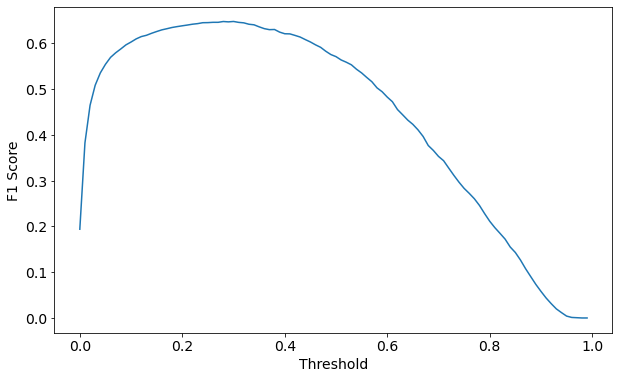

In [93]:
oops , preed_val = run_clf(lr, train, test, features)
optimal_value = get_optimal_f1thresold(target,oops)
print(f1_score(target, (oops>optimal_value)*1))

In [97]:
pred_val = (preed_val>optimal_value)*1
download_file(pred_val, file_name='analytics_vidya_hackthon_sub7.csv')

### **Tuning LightGBM**

* Early Stopping: Stopping the model training, when the model starts to overfit
  * How do we know if model is overfitting ?
* HyperParameter Optimization.
  * Is random search the best way to go ?

**Simple Function to Run Gradient Boosting**

Let's make a simple function to call gradient boosting and get our oofs and predictions. Rather than copying and pasting the same code again and again/

In [111]:
def run_gradient_boosting(clf, fit_params, train, test, features):
    N_SPLITS = 5
    oofs = np.zeros(len(train))
    preds = np.zeros((len(test)))

    folds = StratifiedKFold(n_splits = N_SPLITS)

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
        print(f'\n------------- Fold {fold_ + 1} -------------')

        ### Training Set
        X_trn, y_trn = train[features.columns].iloc[trn_idx], target.iloc[trn_idx]

        ### Validation Set
        X_val, y_val = train[features.columns].iloc[val_idx], target.iloc[val_idx]

        ### Test Set
        X_test = test[features.columns]

        scaler = StandardScaler()
        _ = scaler.fit(X_trn)

        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)

        _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

        ### Instead of directly predicting the classes we will obtain the probability of positive class.
        preds_val = clf.predict_proba(X_val)[:, 1]
        preds_test = clf.predict_proba(X_test)[:, 1]

        fold_score = f1_score(y_val, preds_val.round())
        print(f'\nF1 score for validation set is {fold_score}')

        oofs[val_idx] = preds_val
        preds += preds_test / N_SPLITS


    oofs_score = f1_score(target, oofs.round())
    print(f'\n\nF1 score for oofs is {oofs_score}')

    return oofs, preds


------------- Fold 1 -------------
Training until validation scores don't improve for 400 rounds
[200]	valid_0's binary_logloss: 0.217906
[400]	valid_0's binary_logloss: 0.193036
[600]	valid_0's binary_logloss: 0.183353
[800]	valid_0's binary_logloss: 0.179436
[1000]	valid_0's binary_logloss: 0.177502
[1200]	valid_0's binary_logloss: 0.176647
[1400]	valid_0's binary_logloss: 0.176237
[1600]	valid_0's binary_logloss: 0.175989
[1800]	valid_0's binary_logloss: 0.175874
[2000]	valid_0's binary_logloss: 0.176054
Early stopping, best iteration is:
[1740]	valid_0's binary_logloss: 0.175831

F1 score for validation set is 0.5719148936170213

------------- Fold 2 -------------
Training until validation scores don't improve for 400 rounds
[200]	valid_0's binary_logloss: 0.217925
[400]	valid_0's binary_logloss: 0.192572
[600]	valid_0's binary_logloss: 0.182683
[800]	valid_0's binary_logloss: 0.178457
[1000]	valid_0's binary_logloss: 0.176641
[1200]	valid_0's binary_logloss: 0.175246
[1400]	valid

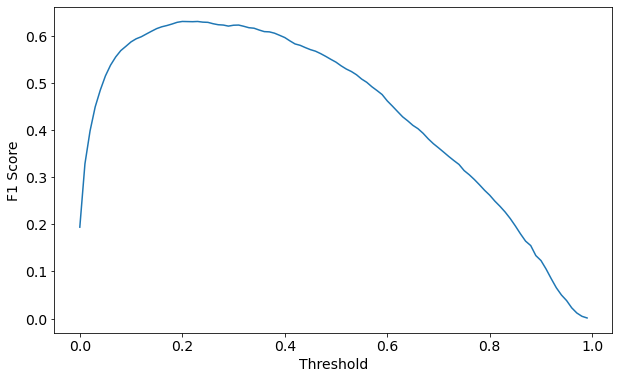

In [112]:
clf = LGBMClassifier(n_estimators = 3000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.38,
                        reg_alpha = 1,
                        reg_lambda = 1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 400}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train, test, features)

optimal_thresh = get_optimal_f1thresold(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')